# Sequence training
The aim of this notebook is to have a ready template to study the effect of different patterns and training regimes in sequence learning and recalling

In [1]:
from __future__ import print_function
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from network import BCPNN
from data_transformer import build_ortogonal_patterns
from analysis_functions import calculate_angle_from_history
from analysis_functions import calculate_winning_pattern_from_distances, calculate_patterns_timings

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

np.set_printoptions(suppress=True, precision=2)

#### Git loading

## Build the patterns and train the network
Firs we store n_patterns in a network of size hypercolumns * minicolumns

In [2]:
hypercolumns = 10
minicolumns = 10
n_patterns = 10  # Number of patterns

patterns_dic = build_ortogonal_patterns(hypercolumns, minicolumns)
patterns = list(patterns_dic.values())
patterns = patterns[:n_patterns]

# Build the network
nn = BCPNN(hypercolumns, minicolumns)
nn.k = 1.0
nn.randomize_pattern()

nn.get_parameters()

{'g_I': 10.0,
 'g_a': 97.0,
 'g_beta': 1,
 'g_w': 1,
 'k': 1.0,
 'sigma': 1.0,
 'tau_a': 2.7,
 'tau_m': 0.05,
 'tau_p': 10.0,
 'tau_z_post': 0.24,
 'tau_z_pre': 0.24}

Now we run the training and plot the training process for both units and activations

In [3]:
dt = 0.001
T_training = 1.0
training_time = np.arange(0, T_training + dt, dt)

for pattern in patterns:
    print('trained')
    nn.run_network_simulation(training_time, I=pattern, save=True)


trained
trained
trained
trained
trained
trained
trained
trained
trained
trained


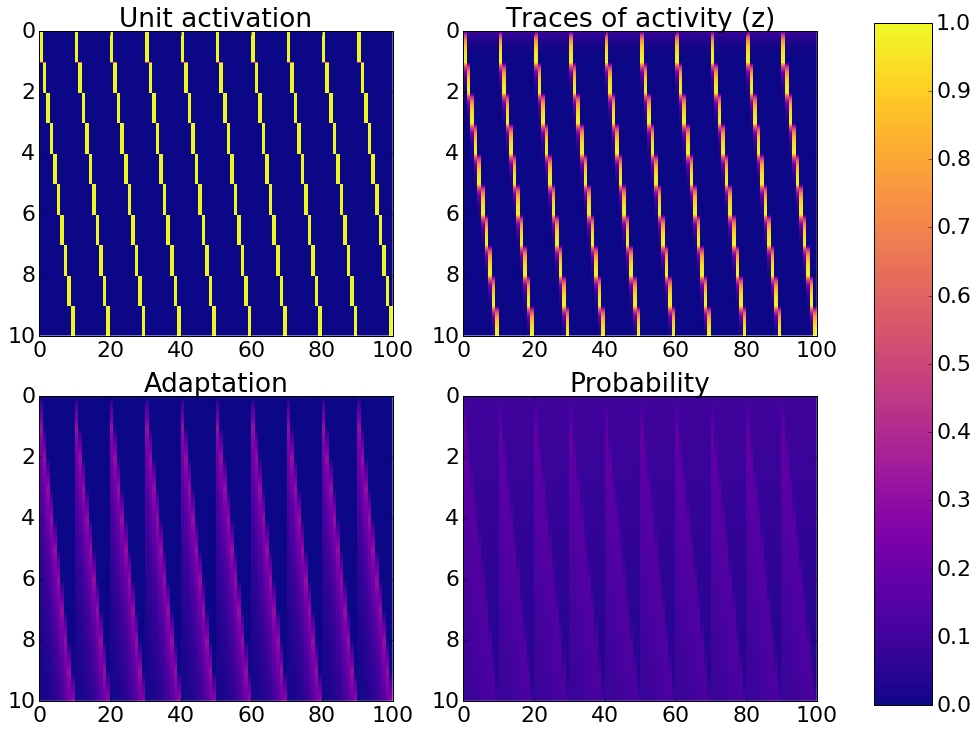

In [4]:
history = nn.history

cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, n_patterns * T_training, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_post'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)

#### Weights matrix and coactivations

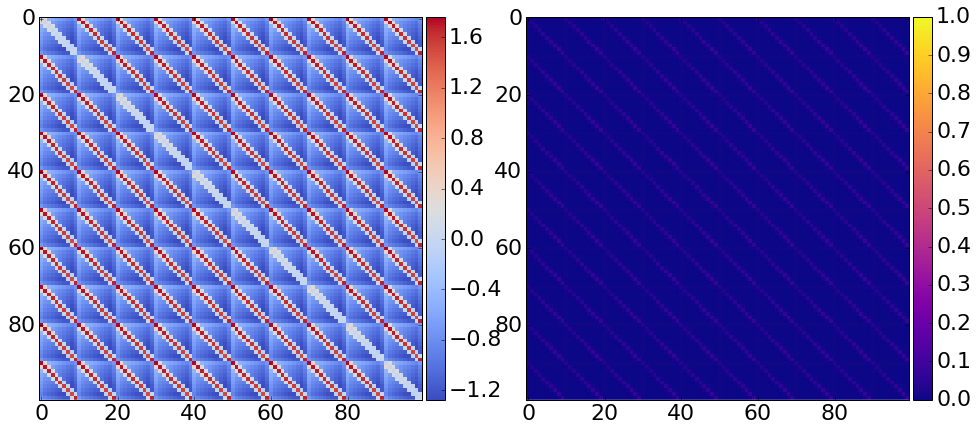

In [5]:
cmap1 = 'coolwarm'
cmap2 = 'plasma'

gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(16, 12))

ax = fig.add_subplot(gs[0, 0])
im = ax.imshow(nn.w, cmap=cmap1, interpolation='None')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, ax=ax, cax=cax)

ax = fig.add_subplot(gs[0, 1])
im = ax.imshow(nn.p_co, cmap=cmap2, interpolation='None', vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, ax=ax, cax=cax)

## Free Recall
Now we run the network in free recall mode to see what kind of patterns we obtained with this process

In [6]:
# Time 
T_recalling = 10.0
recalling_time = np.arange(0, T_recalling + dt, dt)

# Reinitialize parameters
nn.k = 0
nn.empty_history()
# nn.reset_values(keep_connectivity=True)
# nn.randomize_pattern()
history = nn.run_network_simulation(time=recalling_time, save=True)

# Print parameters
nn.get_parameters()

{'g_I': 10.0,
 'g_a': 97.0,
 'g_beta': 1,
 'g_w': 1,
 'k': 0,
 'sigma': 1.0,
 'tau_a': 2.7,
 'tau_m': 0.05,
 'tau_p': 10.0,
 'tau_z_post': 0.24,
 'tau_z_pre': 0.24}

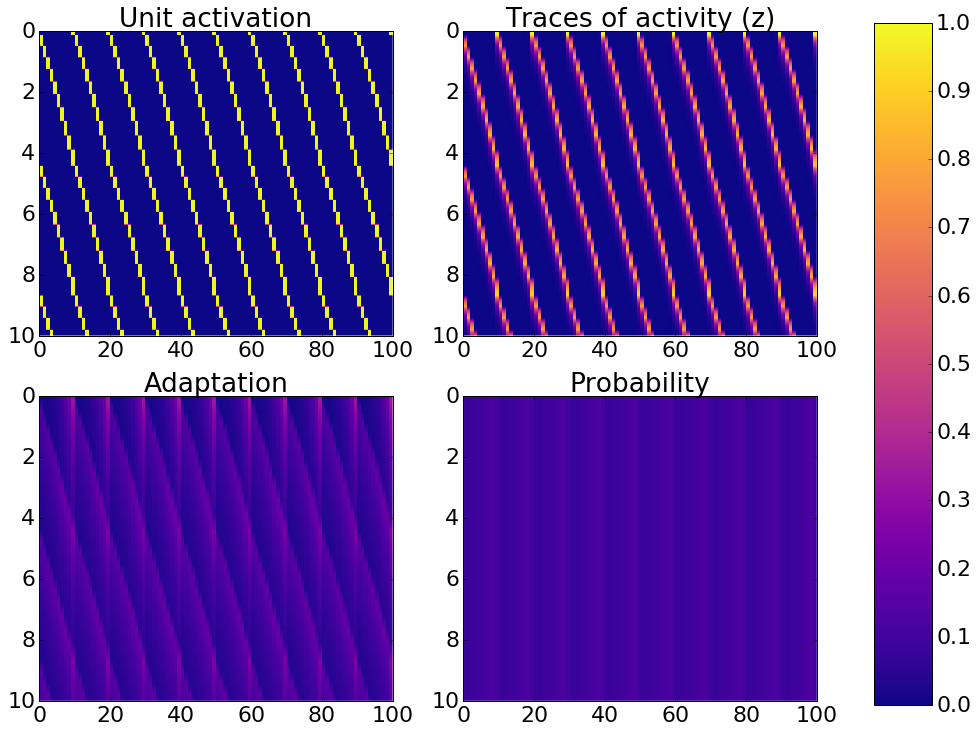

In [7]:
cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, T_recalling, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_post'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)

In [8]:
distances = calculate_angle_from_history(history, patterns)
winning_patterns = calculate_winning_pattern_from_distances(distances)
patterns_timings = calculate_patterns_timings(winning_patterns, dt)

In [9]:
pprint.pprint(patterns_timings)

[(9, 0.128, 0.0, 0.127),
 (0, 0.36199999999999999, 0.127, 0.48799999999999999),
 (1, 0.374, 0.48799999999999999, 0.86099999999999999),
 (2, 0.38800000000000001, 0.86099999999999999, 1.248),
 (3, 0.40500000000000003, 1.248, 1.6520000000000001),
 (4, 0.41699999999999998, 1.6520000000000001, 2.0680000000000001),
 (5, 0.436, 2.0680000000000001, 2.5030000000000001),
 (6, 0.45300000000000001, 2.5030000000000001, 2.9550000000000001),
 (7, 0.47200000000000003, 2.9550000000000001, 3.4260000000000002),
 (8, 0.46400000000000002, 3.4260000000000002, 3.8890000000000002),
 (9, 0.53000000000000003, 3.8890000000000002, 4.4180000000000001),
 (0, 0.36299999999999999, 4.4180000000000001, 4.7800000000000002),
 (1, 0.375, 4.7800000000000002, 5.1539999999999999),
 (2, 0.38800000000000001, 5.1539999999999999, 5.5410000000000004),
 (3, 0.39900000000000002, 5.5410000000000004, 5.9390000000000001),
 (4, 0.41300000000000003, 5.9390000000000001, 6.351),
 (5, 0.42599999999999999, 6.351, 6.7759999999999998),
 (6, 0

#### Reset values
Now reset all the values and run the system again

In [10]:
# Reinitialize parameters
nn.k = 0
nn.empty_history()
nn.reset_values(keep_connectivity=True)
# nn.randomize_pattern()
history = nn.run_network_simulation(time=recalling_time, save=True)

# Print parameters
nn.get_parameters()

{'g_I': 10.0,
 'g_a': 97.0,
 'g_beta': 1,
 'g_w': 1,
 'k': 0,
 'sigma': 1.0,
 'tau_a': 2.7,
 'tau_m': 0.05,
 'tau_p': 10.0,
 'tau_z_post': 0.24,
 'tau_z_pre': 0.24}

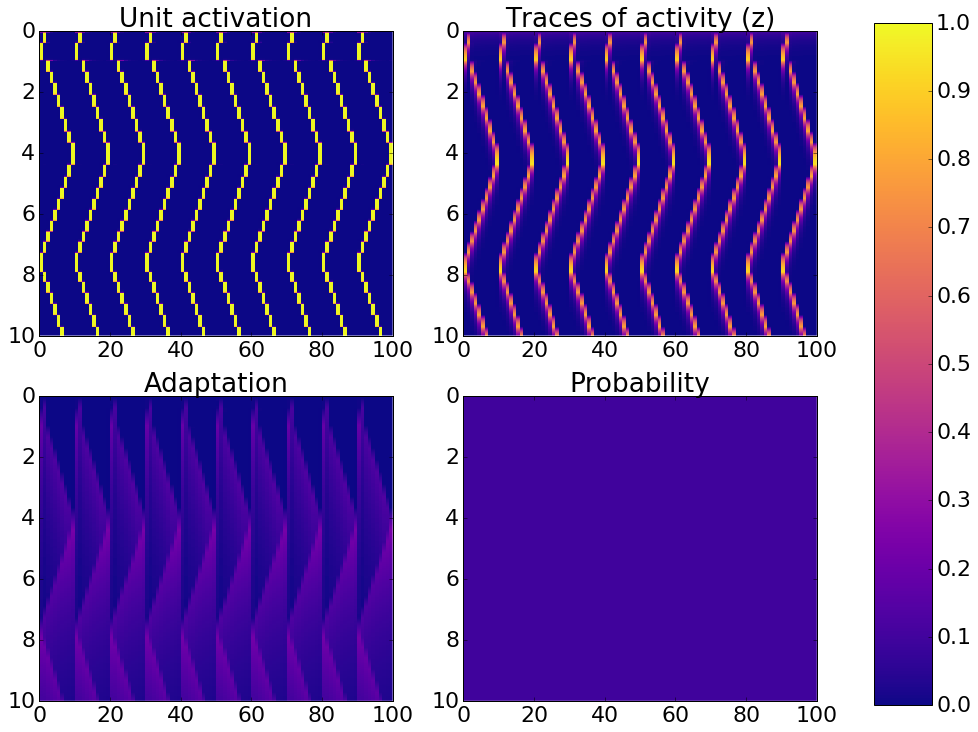

In [11]:
cmap = 'plasma'
extent = [0, minicolumns * hypercolumns, T_recalling, 0]

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(221)
im1 = ax1.imshow(history['o'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax1.set_title('Unit activation')

ax2 = fig.add_subplot(222)
im2 = ax2.imshow(history['z_post'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax2.set_title('Traces of activity (z)')

ax3 = fig.add_subplot(223)
im3 = ax3.imshow(history['a'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax3.set_title('Adaptation')

ax4 = fig.add_subplot(224)
im4 = ax4.imshow(history['p_pre'], aspect='auto', interpolation='None', cmap=cmap, vmax=1, vmin=0, extent=extent)
ax4.set_title('Probability')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.12, 0.05, 0.79])
fig.colorbar(im1, cax=cbar_ax)